In [9]:
# Paso 1: Importar la librería pandas, que es nuestra herramienta principal para trabajar con datos.
# La renombramos como 'pd' por convención, para escribir menos.
import pandas as pd

# Paso 2: Definir la ruta donde se encuentra nuestro archivo CSV.
# Usamos '../' para indicarle que suba un nivel desde la carpeta 'notebooks' a la raíz del proyecto,
# y luego entre en la carpeta 'data'.
# Asegúrate de que el nombre del archivo coincida exactamente con el que descargaste.
file_path = 'data/Womens Clothing E-Commerce Reviews.csv'

# Paso 3: Cargar el archivo CSV en un DataFrame de pandas.
# Un DataFrame es como una tabla de Excel superpoderosa con la que podemos interactuar con Python.
df = pd.read_csv(file_path)

# Paso 4: ¡Verificar que todo ha salido bien!
# El comando .head() nos muestra las primeras 5 filas de nuestro DataFrame.
# Es la mejor manera de confirmar que los datos se han cargado correctamente.
print("¡Datos cargados con éxito! Estas son las primeras 5 filas:")
df.head()

¡Datos cargados con éxito! Estas son las primeras 5 filas:


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [15]:
# Importamos las librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Le decimos a Jupyter que muestre los gráficos en el propio notebook
# Esto es un "comando mágico" de Jupyter.
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [10]:
# El comando .info() es como una radiografía de nuestros datos.
# Nos muestra:
# 1. El número total de filas y columnas.
# 2. El nombre de cada columna.
# 3. La cantidad de valores "no nulos" por columna (clave para detectar datos faltantes).
# 4. El tipo de dato de cada columna (números, texto, etc.).

print("--- Información General del DataFrame ---")
df.info()

--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [11]:
# El comando .describe() calcula estadísticas descriptivas para las columnas numéricas.
# Nos da el conteo, la media (promedio), la desviación estándar, el mínimo, el máximo
# y los percentiles. Es perfecto para tener una primera idea de la distribución de los datos.

print("\n--- Resumen Estadístico de las Columnas Numéricas ---")
df.describe()


--- Resumen Estadístico de las Columnas Numéricas ---


,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [12]:
# .shape nos dice cuántas filas y columnas tiene nuestro dataset.
# Es una tupla (filas, columnas).
df.shape

(23486, 11)

In [13]:
# Verificamos cuántos valores nulos hay por columna
print("Valores nulos ANTES de la limpieza:")
print(df.isnull().sum())

# Eliminamos las filas donde 'Review Text' es nulo.
# 'inplace=True' modifica el DataFrame directamente, sin necesidad de reasignarlo.
df.dropna(subset=['Review Text'], inplace=True)

# Verificamos de nuevo para confirmar que se eliminaron
print("\nValores nulos DESPUÉS de la limpieza:")
print(df.isnull().sum())

Valores nulos ANTES de la limpieza:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Valores nulos DESPUÉS de la limpieza:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64


In [14]:
# Creamos una nueva columna 'Review Length' que contiene el número de caracteres de cada reseña.
# Usamos .str.len() que es una función de pandas para strings.
df['Review Length'] = df['Review Text'].str.len()

# Veamos las primeras filas con la nueva columna
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


C:\Users\Coder\AppData\Local\Temp\ipykernel_9884\4098800348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', palette='cool')


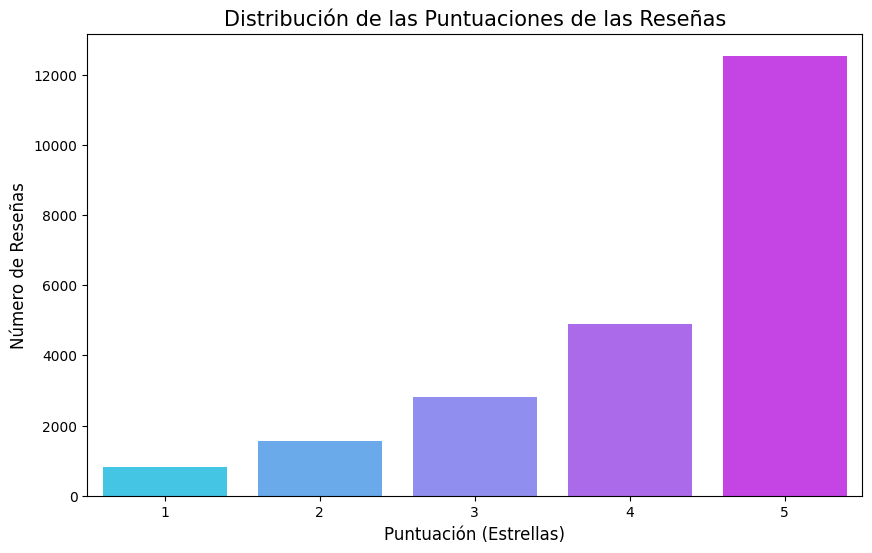

In [29]:
# Creamos un lienzo para nuestro gráfico y le damos un tamaño
# Esto hace que el gráfico sea más grande y fácil de ver
plt.figure(figsize=(10, 6))

# Usamos sns.countplot() para contar las ocurrencias de cada 'Rating'
# `data=df` le dice a Seaborn que use tu DataFrame (df)
# `x='Rating'` especifica que la columna 'Rating' irá en el eje x
# `palette='viridis'` es una paleta de colores bonita y profesional
sns.countplot(data=df, x='Rating', palette='cool')

# Añadimos un título para que el gráfico se entienda por sí solo
plt.title('Distribución de las Puntuaciones de las Reseñas', fontsize=15)
# Etiquetamos el eje x
plt.xlabel('Puntuación (Estrellas)', fontsize=12)
# Etiquetamos el eje y
plt.ylabel('Número de Reseñas', fontsize=12)

# Mostramos el gráfico
plt.show()

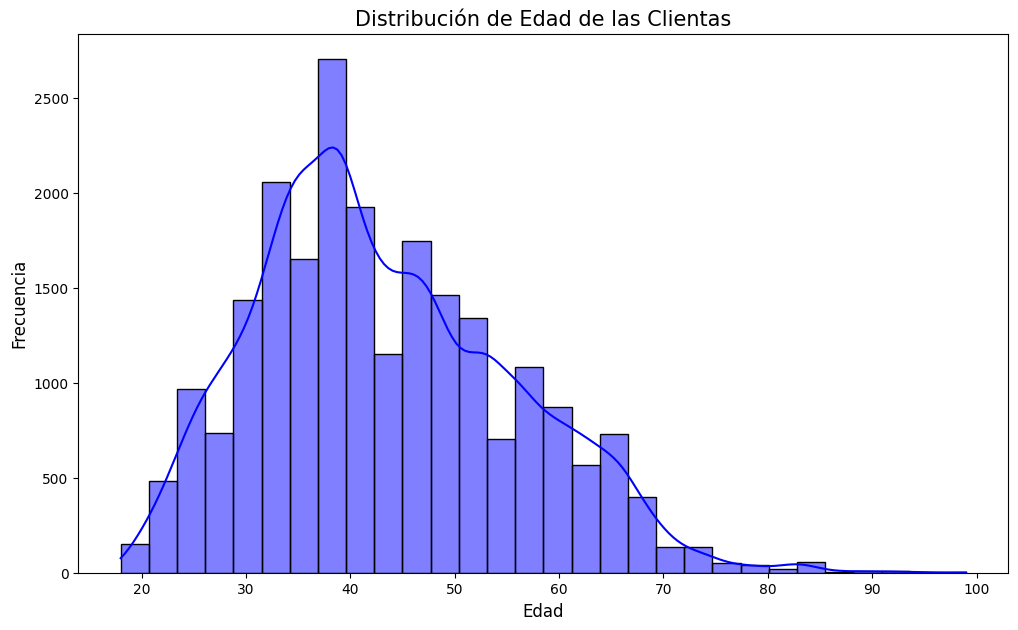

In [25]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(12, 7))

# Usamos sns.histplot() para crear un histograma
# `data=df` y `x='Age'` son lo mismo que antes
# `bins=30` crea 30 "contenedores" o rangos para la edad. Puedes jugar con este número
# `kde=True` añade una línea de densidad que nos ayuda a ver la forma general de la distribución
# `color='purple'` le da un toque de color a las barras
sns.histplot(data=df, x='Age', bins=30, kde=True, color='blue')

# Añadimos un título y etiquetas
plt.title('Distribución de Edad de las Clientas', fontsize=15)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostramos el gráfico
plt.show()

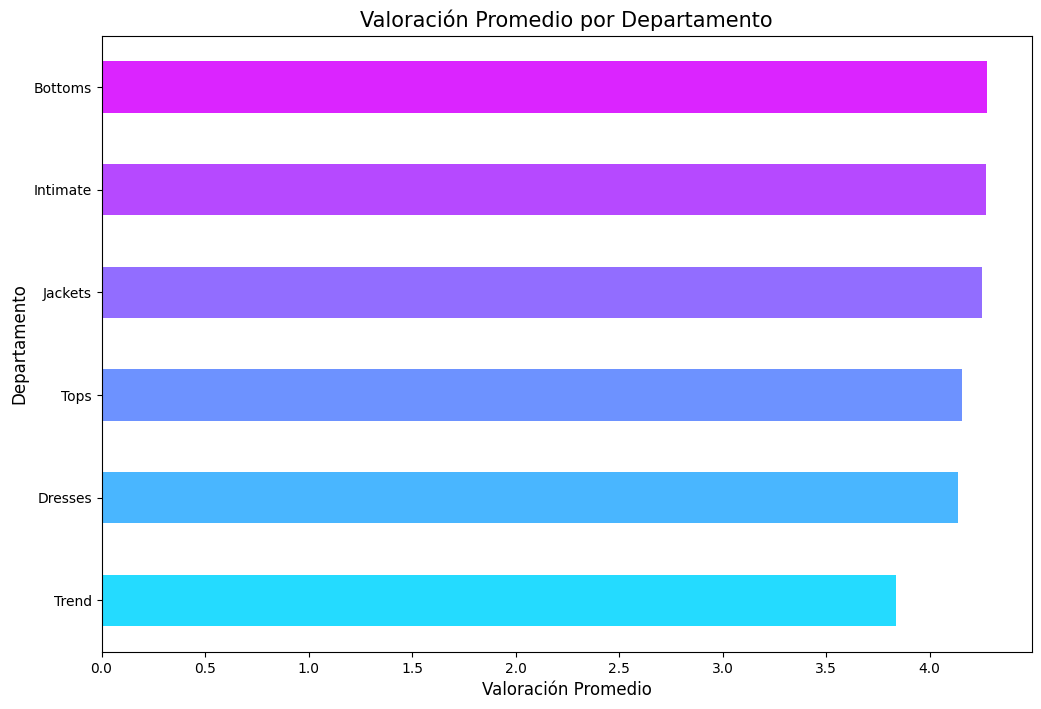

In [28]:
# Paso 1: Agrupamos los datos por 'Department Name' y calculamos la media del 'Rating'
# Usamos .sort_values() para ordenar los departamentos de menor a mayor valoración promedio
avg_rating_by_dept = df.groupby('Department Name')['Rating'].mean().sort_values()

# Paso 2: Creamos el gráfico de barras horizontales (barh)
plt.figure(figsize=(12, 8))

# Usamos el método .plot() directamente sobre el resultado del agrupamiento
# `kind='barh'` le dice a Pandas/Matplotlib que queremos un gráfico de barras horizontal
# `color=sns.color_palette('plasma')` usa una paleta de colores diferente
avg_rating_by_dept.plot(kind='barh', color=sns.color_palette('cool'))

# Añadimos un título y etiquetas
plt.title('Valoración Promedio por Departamento', fontsize=15)
plt.xlabel('Valoración Promedio', fontsize=12)
plt.ylabel('Departamento', fontsize=12)

# Mostramos el gráfico
plt.show()

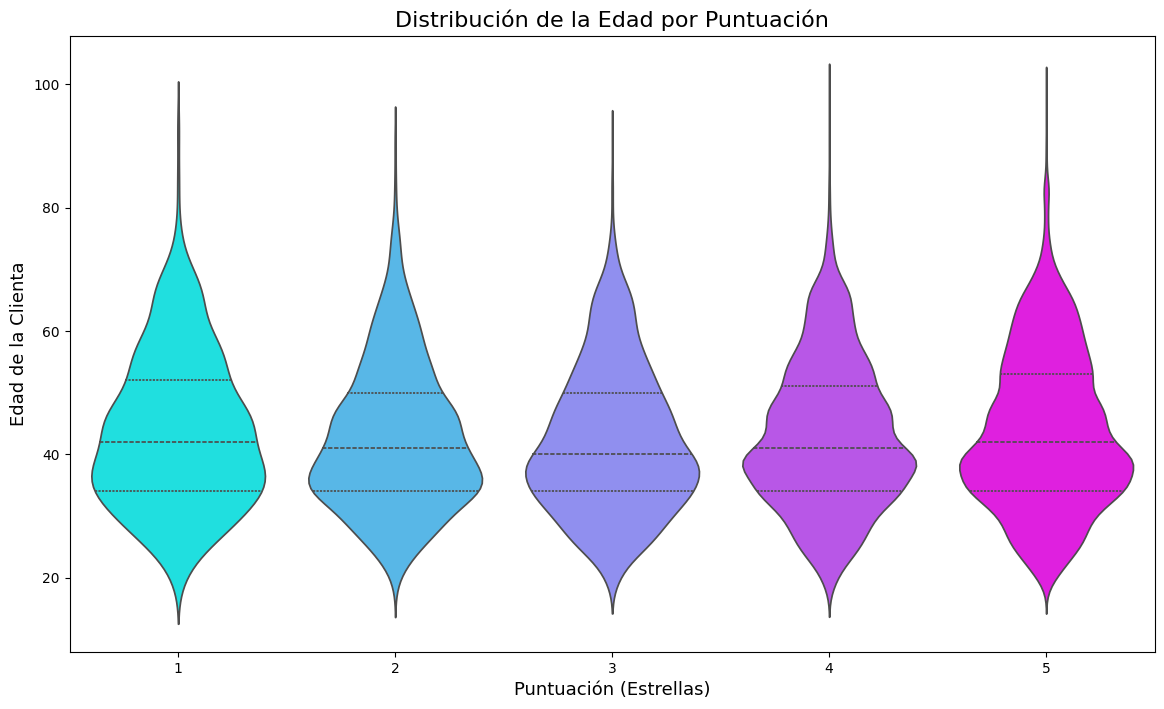

In [27]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Creamos un gráfico de violín
# 'x' es la puntuación (Rating), y 'y' es la edad (Age)
# `palette='pastel'` usa una paleta de colores suave
# `inner='quartile'` muestra las líneas de los cuartiles dentro de cada violín
sns.violinplot(data=df, x='Rating', y='Age', palette='cool', inner='quartile', hue='Rating', legend=False)

# Añadimos títulos y etiquetas para mejorar la legibilidad
plt.title('Distribución de la Edad por Puntuación', fontsize=16)
plt.xlabel('Puntuación (Estrellas)', fontsize=13)
plt.ylabel('Edad de la Clienta', fontsize=13)

# Mostramos el gráfico
plt.show()

C:\Users\Coder\AppData\Local\Temp\ipykernel_9884\2085126535.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_class.index, y=avg_rating_by_class.values, palette='cool')


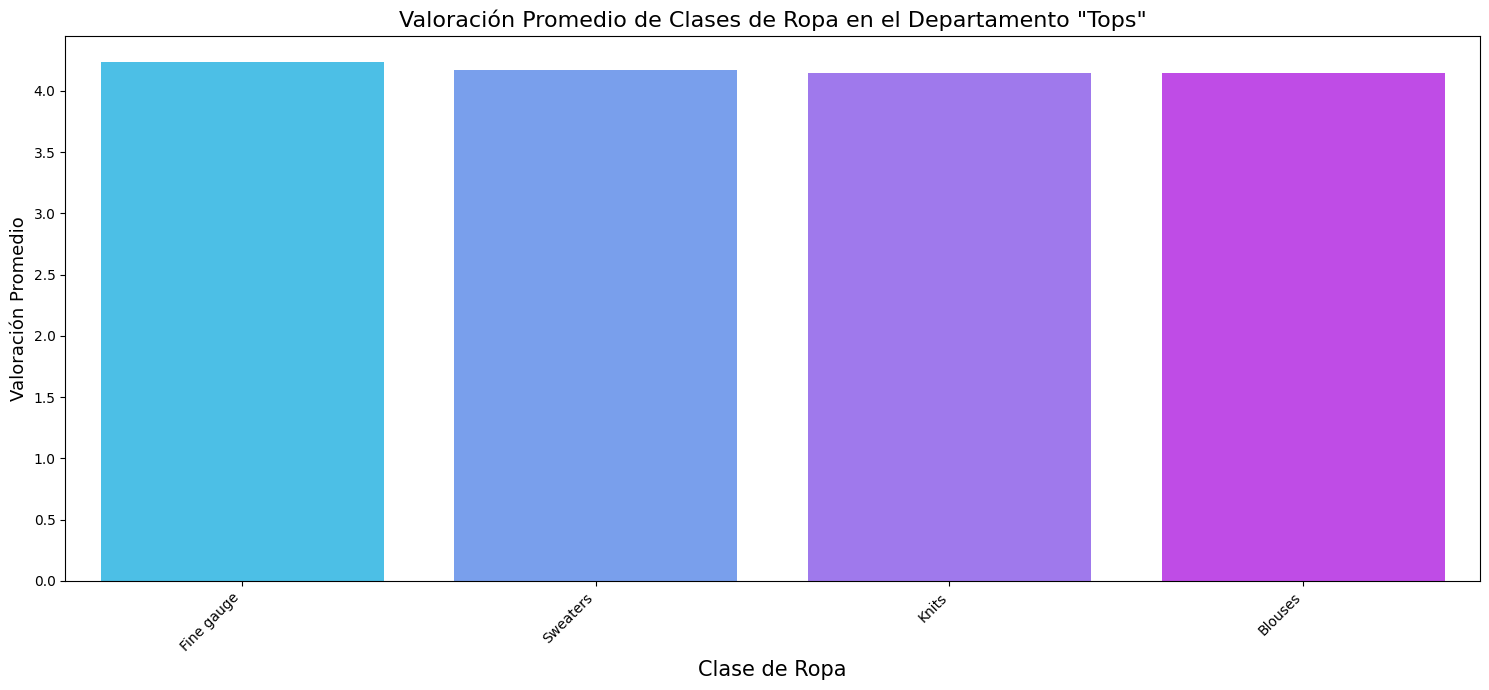

In [33]:
# Primero, filtramos el DataFrame para quedarnos solo con el departamento 'Tops'
tops_df = df[df['Department Name'] == 'Tops']

# Luego, agrupamos por la columna 'Class Name' y calculamos el promedio del 'Rating'
avg_rating_by_class = tops_df.groupby('Class Name')['Rating'].mean().sort_values(ascending=False)

# Ahora, visualizamos los resultados en un gráfico de barras
plt.figure(figsize=(15, 7))

# Usamos sns.barplot para mostrar el promedio de rating por cada clase de ropa
# Usamos `x` y `y` para especificar las columnas
sns.barplot(x=avg_rating_by_class.index, y=avg_rating_by_class.values, palette='cool')

# Ajustamos las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')

# Añadimos títulos y etiquetas
plt.title('Valoración Promedio de Clases de Ropa en el Departamento "Tops"', fontsize=16)
plt.xlabel('Clase de Ropa', fontsize=15)
plt.ylabel('Valoración Promedio', fontsize=13)

# Mostramos el gráfico
plt.tight_layout() # Esto ajusta automáticamente el layout para que todo quepa
plt.show()

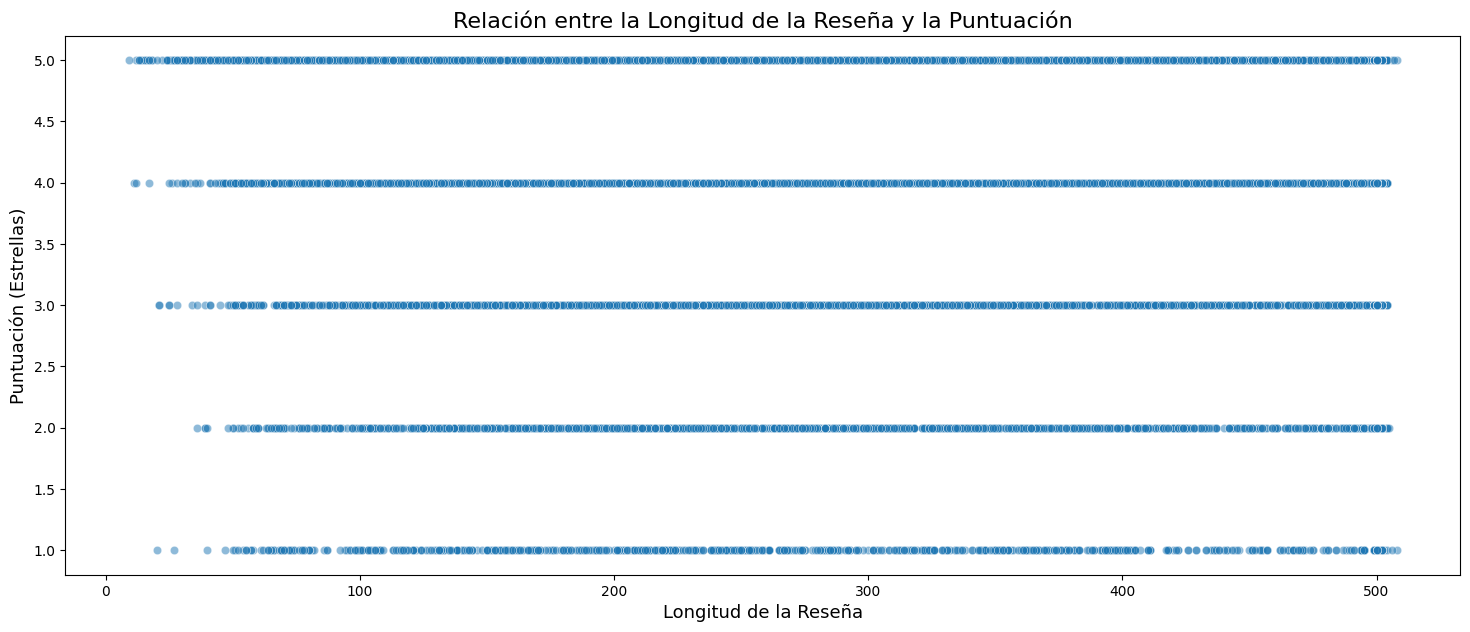

In [32]:
# Primero, aseguramos que la columna 'Review Length' existe.
if 'Review Length' not in df.columns:
    df['Review Length'] = df['Review Text'].str.len()

# Ahora, creamos el diagrama de dispersión
# No es necesario un lienzo grande para este tipo de gráfico
plt.figure(figsize=(18, 7))

# Usamos sns.scatterplot para ver la relación entre dos variables numéricas
# 'x' es la longitud de la reseña y 'y' es la puntuación
# `alpha=0.5` hace los puntos un poco transparentes, lo que ayuda a ver la densidad de los datos
sns.scatterplot(data=df, x='Review Length', y='Rating', alpha=0.5)

# Añadimos títulos y etiquetas
plt.title('Relación entre la Longitud de la Reseña y la Puntuación', fontsize=16)
plt.xlabel('Longitud de la Reseña', fontsize=13)
plt.ylabel('Puntuación (Estrellas)', fontsize=13)

# Mostramos el gráfico
plt.show()